just checking and reproducing for now

In [1]:
import pandas as pd
df = pd.read_feather("pre-ms-models_database/10_dim_grid/Teff_10000-10250_logg_3.9-4.0_z_0.006_he_0.214.feather")
print(df.head())

# first of all what are the columns and number examples??

    index  model_id     mass     Teff    log_g   radius        L        age  \
0  540945  180316.0  2.38984  9752.15  3.86831  2.97832  72.0821  2323810.0   
1  540946  180316.0  2.38984  9752.15  3.86831  2.97832  72.0821  2323810.0   
2  540947  180316.0  2.38984  9752.15  3.86831  2.97832  72.0821  2323810.0   
3  540948  180317.0  2.39053  9805.07  3.87881  2.94297  71.9215  2332250.0   
4  540949  180317.0  2.39053  9805.07  3.87881  2.94297  71.9215  2332250.0   

   alphas     zs  ...   O1_drot   O2_drot   O3_drot   O4_drot   O5_drot  \
0     2.0  0.006  ...  0.282553  0.282553  0.282553  0.282553  0.282553   
1     2.0  0.006  ...  0.141002  0.280424  0.282115  0.281913  0.281490   
2     2.0  0.006  ...  0.250795  0.259484  0.256354  0.265119  0.269838   
3     2.0  0.006  ...  0.287701  0.287701  0.287701  0.287701  0.287701   
4     2.0  0.006  ...  0.149038  0.285979  0.287250  0.286995  0.286550   

    O6_drot   O7_drot   O8_drot   O9_drot  parent_model_numbers  
0  0.282

In [2]:
print(df.columns)

Index(['index', 'model_id', 'mass', 'Teff', 'log_g', 'radius', 'L', 'age',
       'alphas', 'zs', 'e_fold', 'betas', 'mlins', 'mdots', 'Dmixs', 'f1s',
       'hes', 'l_val', 'F', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8',
       'O9', 'F_drot', 'O1_drot', 'O2_drot', 'O3_drot', 'O4_drot', 'O5_drot',
       'O6_drot', 'O7_drot', 'O8_drot', 'O9_drot', 'parent_model_numbers'],
      dtype='object')


  0%|                                                    | 0/15 [00:00<?, ?it/s]/home/tatjanagobold/master/Dirty_Asteroseismic_Modelling/pre_ms_models_database.py:376: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new = pd.concat([new,load])# print(count)
100%|███████████████████████████████████████████| 15/15 [01:01<00:00,  4.08s/it]
/home/tatjanagobold/master/Dirty_Asteroseismic_Modelling/pre_ms_models_database.py:200: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/home/tatjanagobold/master/Dirty_Asteroseismic_Modelling/pre_ms_models_database.py:200: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


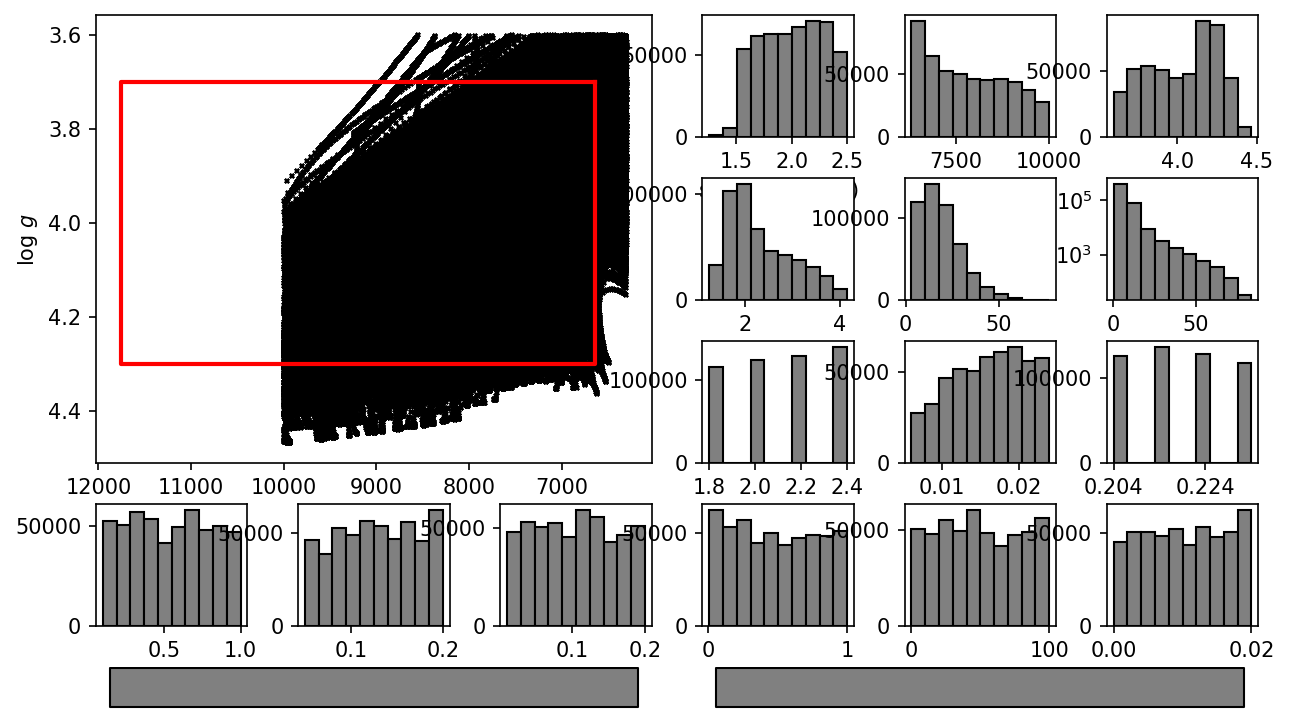

In [3]:
import pre_ms_models_database as md

In [5]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)

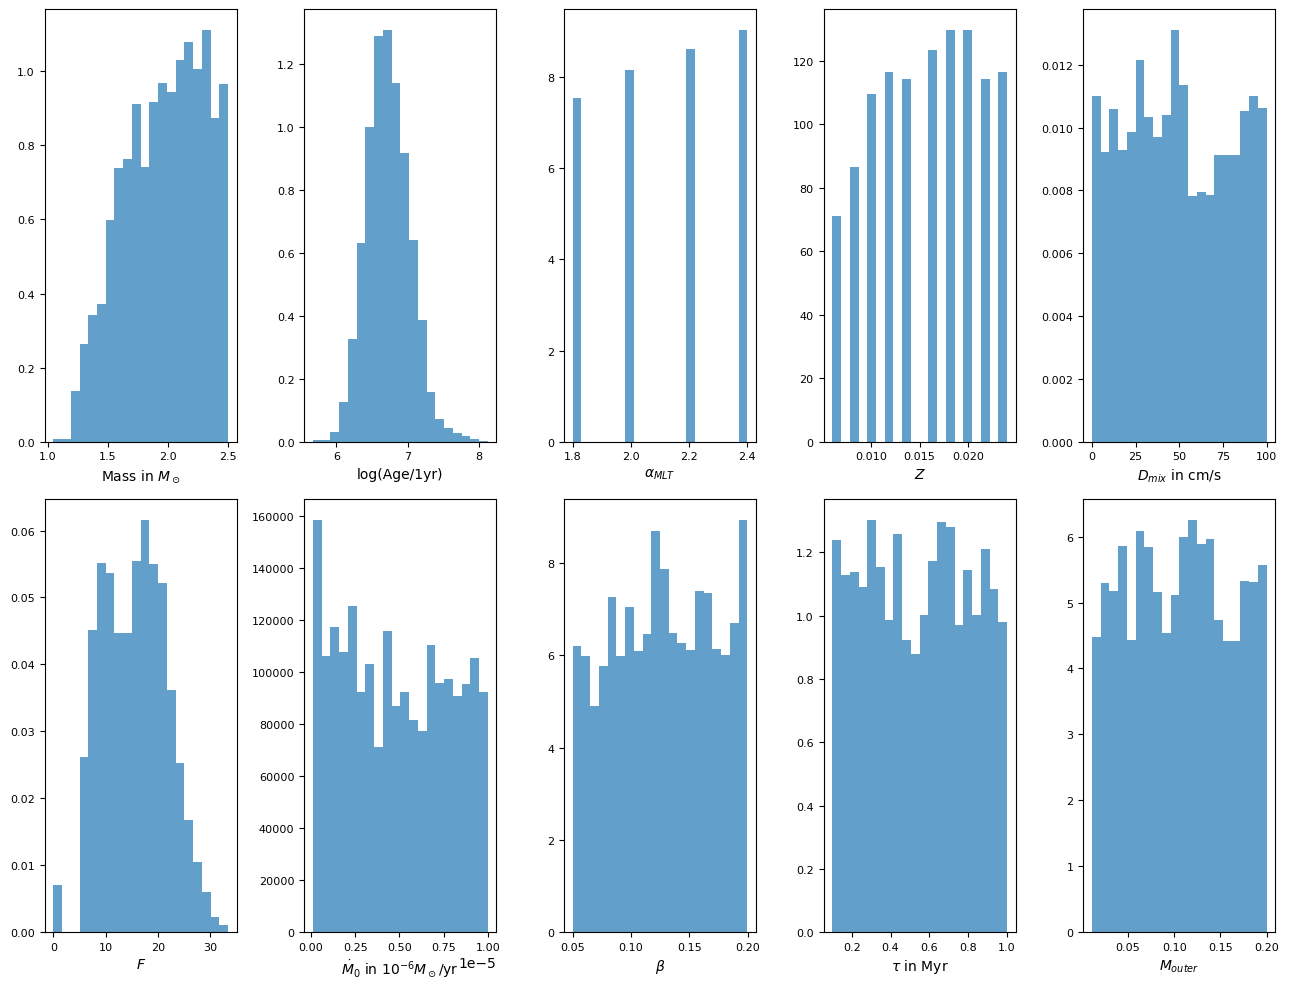

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folder containing the data
folder = "pre-ms-models_database"
#grids = ["10_dim_grid", "6_dim_grid", "10_dim_grid_extension"]

grids = ["10_dim_grid", "10_dim_grid_extension"] # because with only the 10 dim grids, there are no spikes in the last 4 plots


dfs = []
for grid in grids:
    grid_path = os.path.join(folder, grid)
    for file in os.listdir(grid_path):
        if file.endswith(".feather"):
            file_path = os.path.join(grid_path, file)
            df = pd.read_feather(file_path)
            dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

# Apply log10 to Age
data["age"] = np.log10(data["age"])

# Column names and labels for plotting
columns_to_plot = {
    "mass": r"Mass in $M_\odot$",
    "age": r"log(Age/1yr)",
    "alphas": r"$\alpha_{MLT}$",
    "zs": r"$Z$",
    "Dmixs": r"$D_{mix}$ in cm/s",
    "F": r"$F$",
    "mdots": r"$\dot{M}_0$ in $10^{-6} M_\odot$/yr",
    "betas": r"$\beta$",
    "e_fold": r"$\tau$ in Myr",
    "mlins": r"$M_{outer}$"
}

# Create subplots
fig, axes = plt.subplots(2,5, figsize=(13, 10), dpi= 100)
axes = axes.flatten()

for ax, (col, label) in zip(axes, columns_to_plot.items()):
    ax.hist(data[col], bins=20, density=True, alpha=0.7)
    ax.set_xlabel(label, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

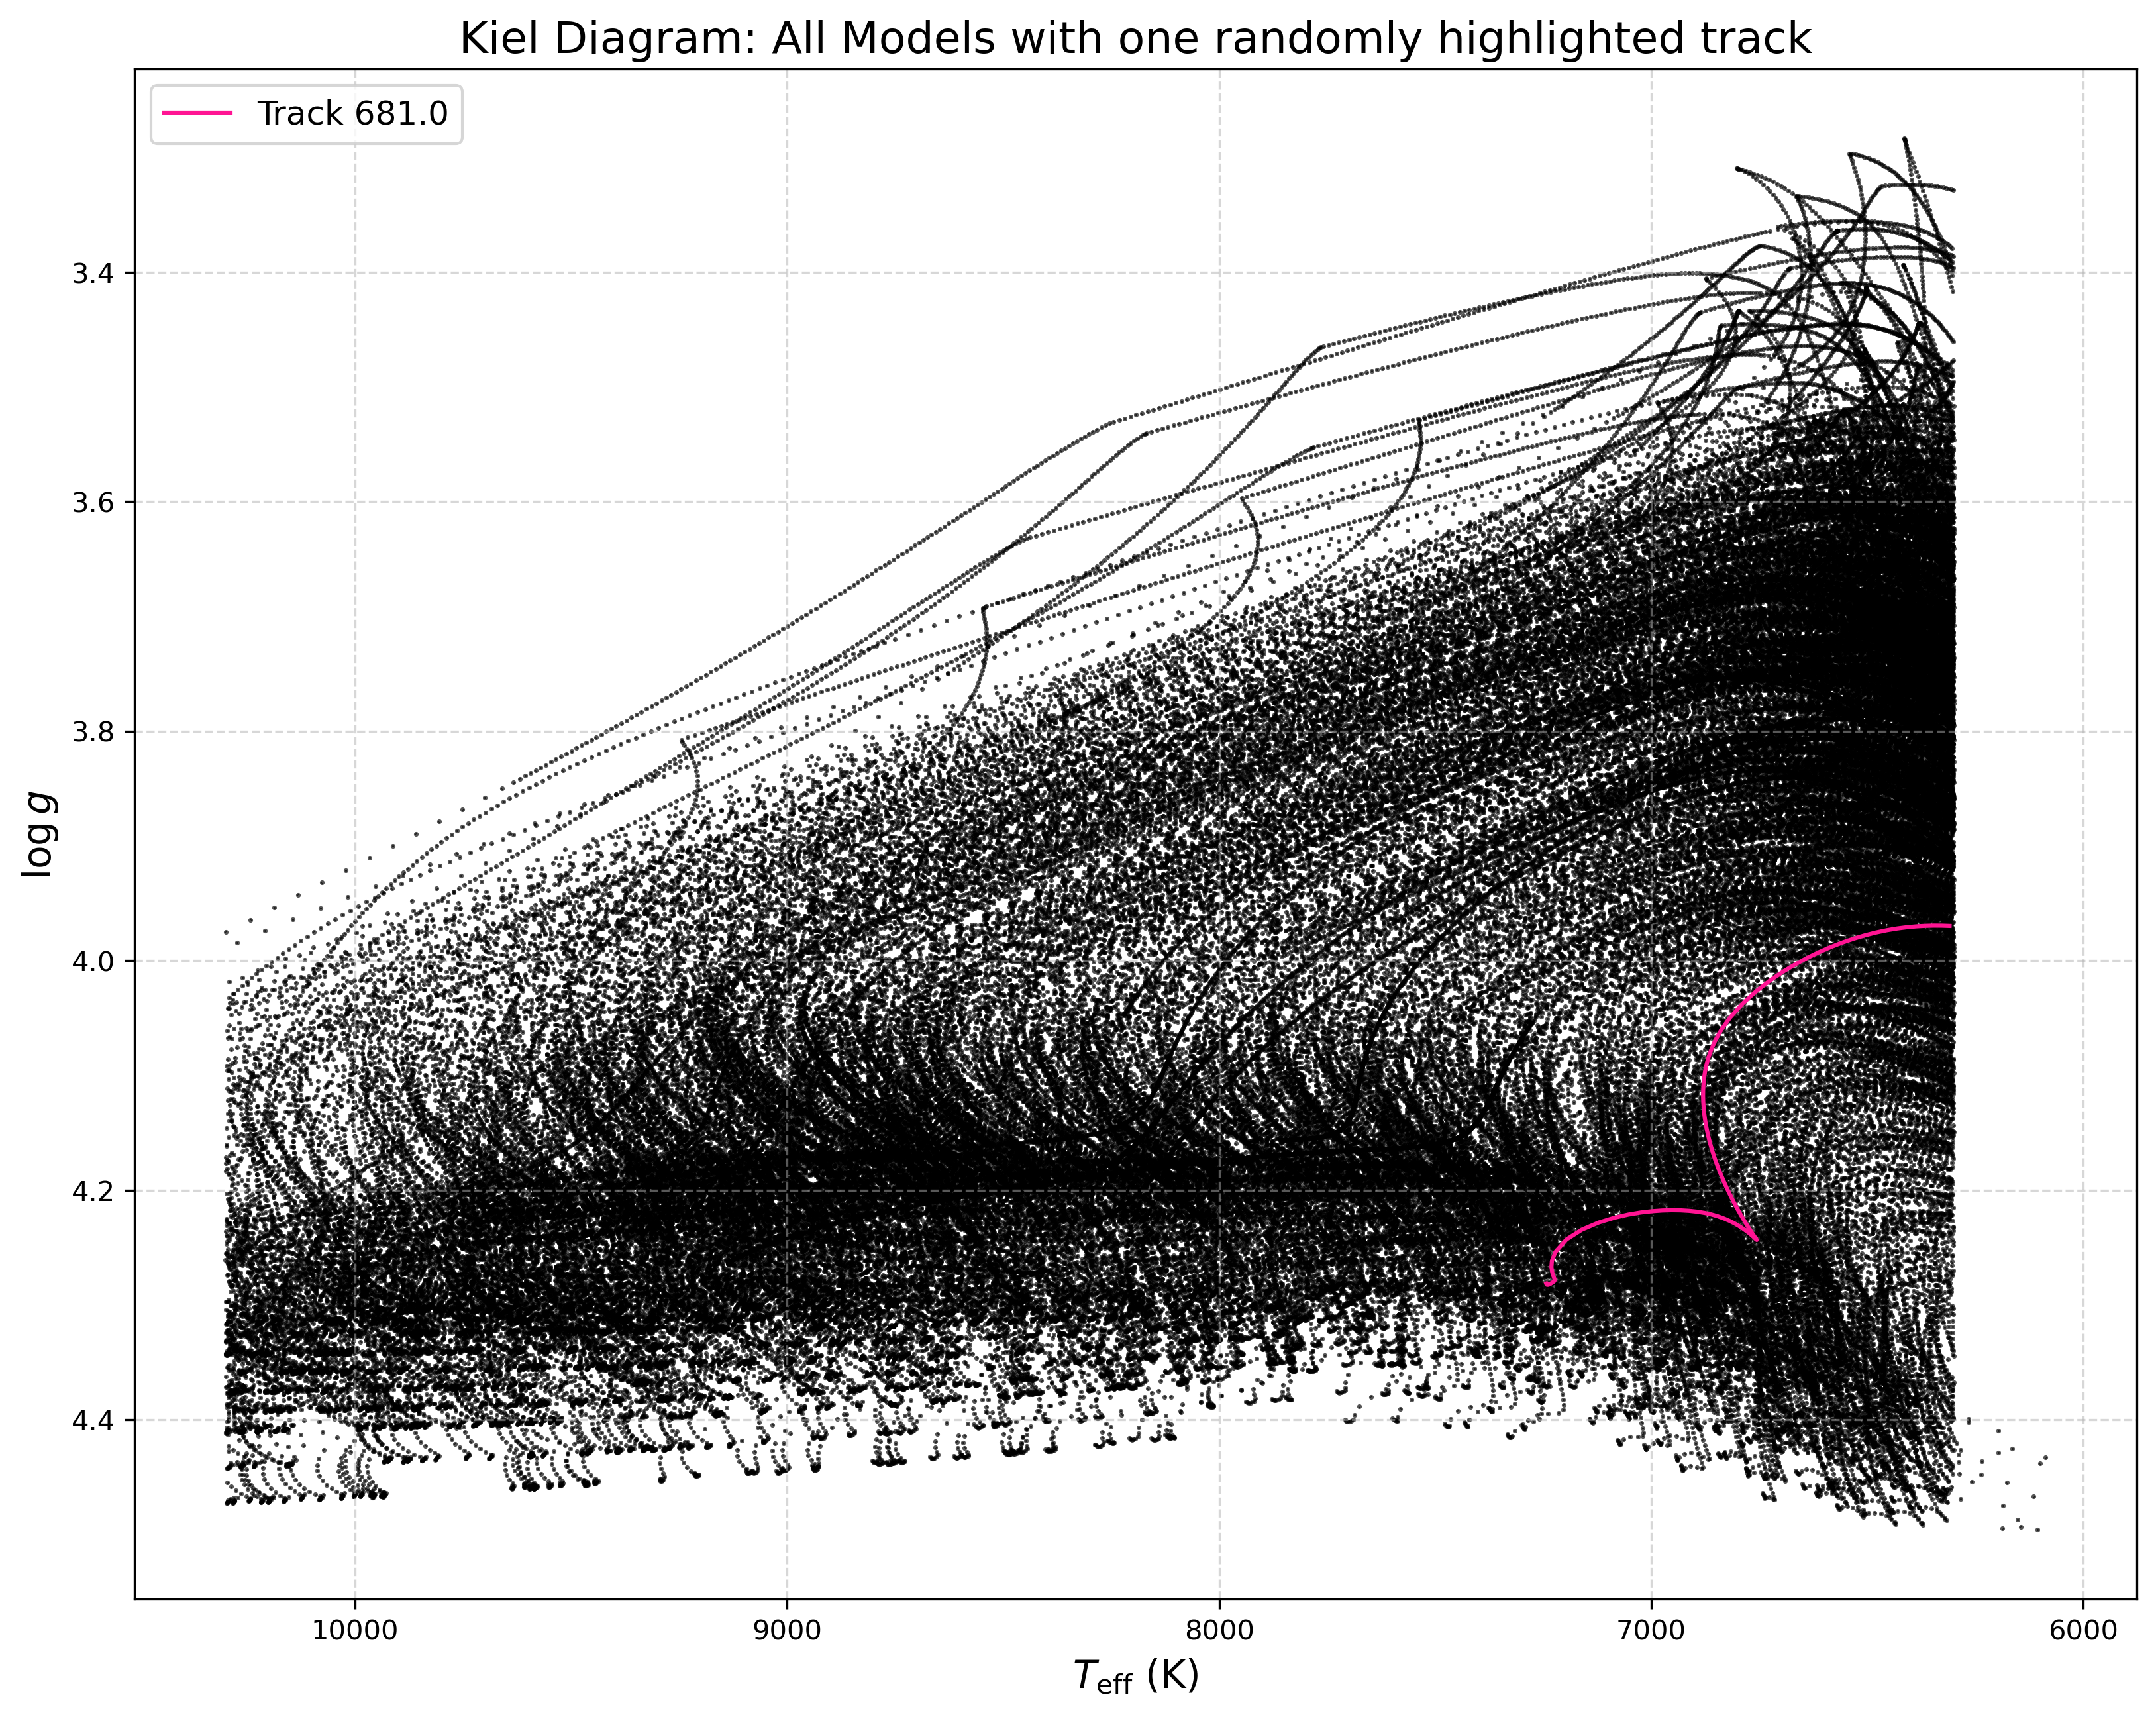

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract columns
teff = data["Teff"]
logg = data["log_g"]

# Pick a random track using 'parent_model_numbers' for smooth evolution
unique_tracks = data["parent_model_numbers"].unique()
random_track = np.random.choice(unique_tracks)  # Select one at random
highlight = data[data["parent_model_numbers"] == random_track]  # Extract track data
highlight = highlight.sort_values(by="age")  # Ensure a smooth curve

plt.figure(figsize=(13, 10), dpi=300)
plt.scatter(teff, logg, c="black", alpha=0.3, s=0.5)  

# Highlighted track in pink
plt.plot(highlight["Teff"], highlight["log_g"], color="deeppink", linewidth=1.5, label=f"Track {random_track}")

plt.xlabel(r"$T_{\mathrm{eff}}$ (K)", fontsize=14)
plt.ylabel(r"$\log g$", fontsize=14)
plt.gca().invert_xaxis()  # Hotter stars on the left
plt.gca().invert_yaxis()  # Higher gravity at the top
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(frameon=True, fontsize=12)
plt.title("Kiel Diagram: All Models with one randomly highlighted track", fontsize=16)

plt.show()

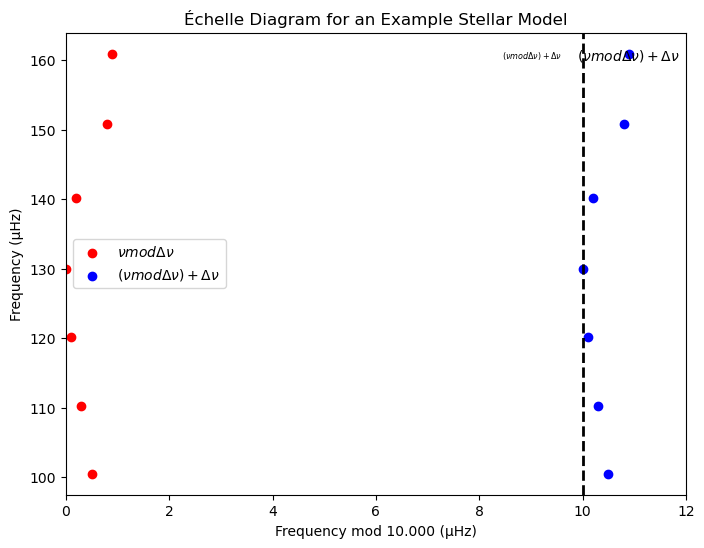

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_echelle(ax, model_frequencies):
    """
    Plots an échelle diagram for a given set of mode frequencies.
    
    Parameters:
    ax : matplotlib axis object
        The axis to plot on.
    model_frequencies : array-like
        Theoretical oscillation frequencies for a given stellar model.
    """
    # Define the large separation Δν (e.g., from literature or your data)
    delta_nu = np.median(np.diff(sorted(model_frequencies)))  # Rough estimate
    
    # Compute modulo frequencies
    mod_frequencies = model_frequencies % delta_nu
    
    # Plot points
    ax.scatter(mod_frequencies, model_frequencies, color='r', marker='o', label=r'$\nu mod \Delta\nu$')
    ax.scatter(mod_frequencies + delta_nu, model_frequencies, color='b', marker='o', label=r'$(\nu mod \Delta\nu) + \Delta\nu$')

    # Add reference line at Δν
    ax.axvline(delta_nu, color='black', linestyle='--', linewidth=2)

    # Labels and formatting
    ax.set_ylabel(r'Frequency (μHz)')
    ax.set_xlabel(f'Frequency mod {delta_nu:.3f} (μHz)')
    ax.set_xlim(0, 1.2 * delta_nu)
    ax.legend()

    # Add explanatory text
    ax.text(0.99, 0.95, r"$(\nu mod \Delta\nu) + \Delta\nu$", 
            ha='right', va='center', transform=ax.transAxes)
    ax.text(0.8, 0.95, r"$(\nu mod \Delta\nu) + \Delta\nu$", 
            ha='right', va='center', transform=ax.transAxes, fontsize='xx-small')

# ===== Example Usage with Real Data from Grids =====
# Assume we have extracted mode frequencies for a particular track
example_model_frequencies = np.array([100.5, 110.3, 120.1, 130.0, 140.2, 150.8, 160.9])  # Replace with real data

fig, ax = plt.subplots(figsize=(8, 6))
plot_echelle(ax, example_model_frequencies)
plt.title("Échelle Diagram for an Example Stellar Model")
plt.show()

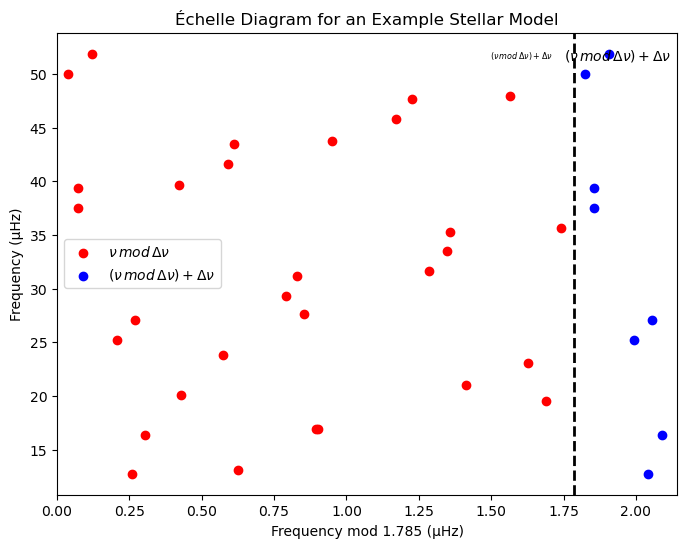

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_echelle(ax, model_data):
    """
    Plots an échelle diagram using real mode frequencies from the dataset.

    Parameters:
    ax : matplotlib axis object
        The axis to plot on.
    model_data : pandas DataFrame
        The DataFrame containing the mode frequencies.
    """
    # Extract only the fundamental and overtones (ignore *_drot columns)
    frequency_columns = ['F', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9']
    frequencies = model_data[frequency_columns].values.flatten()  # Convert to 1D array
    
    # Remove NaN values (some models might not have all overtones)
    frequencies = frequencies[~np.isnan(frequencies)]
    
    # Estimate large frequency separation (Δν) using median spacing
    delta_nu = np.median(np.diff(np.sort(frequencies)))
    #delta_nu = 5.705

    # Compute modulo frequencies
    mod_frequencies = frequencies % delta_nu

    # Plot points
    ax.scatter(mod_frequencies, frequencies, color='r', marker='o', label=r'$\nu \, mod \, \Delta\nu$')
    ax.scatter(mod_frequencies + delta_nu, frequencies, color='b', marker='o', label=r'$(\nu \, mod \, \Delta\nu) + \Delta\nu$')

    # Add reference line at Δν
    ax.axvline(delta_nu, color='black', linestyle='--', linewidth=2)

    # Labels and formatting
    ax.set_ylabel(r'Frequency (μHz)')
    ax.set_xlabel(f'Frequency mod {delta_nu:.3f} (μHz)')
    ax.set_xlim(0, 1.2 * delta_nu)
    ax.legend()

    # Add explanatory text
    ax.text(0.99, 0.95, r"$(\nu \, mod \, \Delta\nu) + \Delta\nu$", 
            ha='right', va='center', transform=ax.transAxes)
    ax.text(0.8, 0.95, r"$(\nu \, mod \, \Delta\nu) + \Delta\nu$", 
            ha='right', va='center', transform=ax.transAxes, fontsize='xx-small')

# ===== Example Usage with Real Data =====
import pandas as pd

# Load your feather file (replace 'your_file.feather' with the actual path)
data = pd.read_feather('pre-ms-models_database/10_dim_grid/Teff_10000-10250_logg_4.1-4.2_z_0.006_he_0.204.feather')

# Select an example track (e.g., first model)
example_model = data[data["model_id"] == data["model_id"].unique()[0]]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_echelle(ax, example_model)
plt.title("Échelle Diagram for an Example Stellar Model")
plt.show()

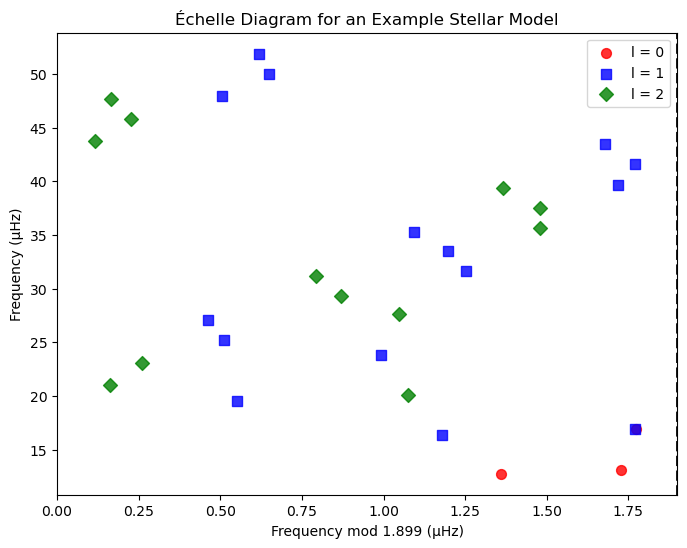

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_large_separation(mode_frequencies):
    """
    Computes large frequency separation (Δν) using median spacing within the same l values.
    
    Parameters:
    mode_frequencies : dict
        Dictionary of frequencies for l = 0, 1, 2.
    
    Returns:
    float : Estimated Δν.
    """
    delta_nu_vals = []

    for l in mode_frequencies:
        sorted_freqs = np.sort(mode_frequencies[l])  # Sort by frequency
        for i in range(len(sorted_freqs) - 1):
            delta_nu_vals.append(sorted_freqs[i + 1] - sorted_freqs[i])  # Only consecutive spacings
    
    return np.median(delta_nu_vals)  # Use median for robustness

def plot_echelle(ax, model_data):
    """
    Plots an Échelle diagram using real mode frequencies.
    
    Parameters:
    ax : matplotlib axis object
        The axis to plot on.
    model_data : pandas DataFrame
        The DataFrame containing the mode frequencies.
    """
    # Extract mode frequencies for l = 0, 1, 2
    mode_frequencies = {
        0: model_data['F'].values,  # l = 0 (radial modes)
        1: model_data[['O1', 'O3', 'O5', 'O7', 'O9']].values.flatten(),  # l = 1 (odd overtones)
        2: model_data[['O2', 'O4', 'O6', 'O8']].values.flatten()  # l = 2 (even overtones)
    }
    
    # Remove NaNs
    for l in mode_frequencies:
        mode_frequencies[l] = mode_frequencies[l][~np.isnan(mode_frequencies[l])]

    # Estimate Δν properly
    delta_nu = compute_large_separation(mode_frequencies)

    # Define colors and markers for each l value
    l_colors = {0: 'red', 1: 'blue', 2: 'green'}
    l_markers = {0: 'o', 1: 's', 2: 'D'}  # Circle, square, diamond markers

    # Plot each l mode separately
    for l, freqs in mode_frequencies.items():
        mod_frequencies = freqs % delta_nu  # Compute mod Δν
        ax.scatter(mod_frequencies, freqs, color=l_colors[l], marker=l_markers[l], label=f'l = {l}', alpha=0.8, s=50)

    # Add reference line at Δν
    ax.axvline(delta_nu, color='black', linestyle='--', linewidth=2)

    # Labels and formatting
    ax.set_ylabel(r'Frequency (μHz)')
    ax.set_xlabel(f'Frequency mod {delta_nu:.3f} (μHz)')
    ax.set_xlim(0, delta_nu)
    ax.legend()
    ax.set_title("Échelle Diagram for an Example Stellar Model")

# ===== Example Usage with Real Data =====
# Load data
data = pd.read_feather('pre-ms-models_database/10_dim_grid/Teff_10000-10250_logg_4.1-4.2_z_0.006_he_0.204.feather')

# Select an example model
example_model = data[data["model_id"] == data["model_id"].unique()[0]]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_echelle(ax, example_model)
plt.show()